# Import Libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load dataset

In [115]:
df = pd.read_excel('E Commerce Dataset.xlsx')
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2887,52888,0,16.0,Computer,1,28.0,Credit Card,Female,3.0,4,Laptop & Accessory,3,Married,4,0,17.0,1.0,2.0,3.0,177.65
1039,51040,0,13.0,Mobile Phone,1,22.0,Debit Card,Female,2.0,3,Fashion,1,Single,7,1,15.0,1.0,3.0,3.0,179.45
1909,51910,0,18.0,Mobile Phone,3,8.0,COD,Male,2.0,5,Laptop & Accessory,3,Single,1,0,13.0,1.0,3.0,1.0,166.32
5272,55273,1,2.0,Mobile Phone,1,9.0,Credit Card,Male,3.0,4,Laptop & Accessory,4,Married,6,0,12.0,2.0,2.0,5.0,173.55
4258,54259,0,31.0,Mobile Phone,3,17.0,Credit Card,Male,3.0,4,Grocery,3,Single,2,0,14.0,NaN,2.0,9.0,263.72


In [116]:
# drop CustomerID karena unique valuesnya terlalu banyak
df.drop('CustomerID', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [117]:
df['Churn'] = df['Churn'].astype(str)
df['CityTier'] = df['CityTier'].astype(str)

Pengamatan\:
1. Data terdiri dari 5630 baris
2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris)

In [118]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['Churn', 'CityTier', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
nums = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

In [119]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5366.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,10.189899,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,8.557241,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,9.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,16.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,61.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [120]:
# ringkasan statistik dari kolom kategori
df[cats].describe()

,Churn,CityTier,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630,5630,5630
unique,2,3,3,7,2,6,3
top,0,1,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,4682,3666,2765,2314,3384,2050,2986


## Merge Value Ganda

In [121]:
#Sebelum Merge
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Churn:
0    4682
1     948
Name: Churn, dtype: int64

Value count kolom CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

Value count kolom PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64


In [122]:
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [123]:
#Sesudah Merge
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Churn:
0    4682
1     948
Name: Churn, dtype: int64

Value count kolom CityTier:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

Value count kolom PreferredLoginDevice:
Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      3384
Female    2246
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



# A. Missing Values

In [124]:
# jumlah entry NULL di setiap kolom
df.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [125]:
sum_missing = df.isna().sum()
percent_missing = round(df.isnull().sum() * 100 / len(df),2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True)
missing_value_df

,column_name,sum_missing,percent_missing
0,Churn,0,0.00
1,Tenure,264,4.69
2,PreferredLoginDevice,0,0.00
3,CityTier,0,0.00
4,WarehouseToHome,251,4.46
5,PreferredPaymentMode,0,0.00
6,Gender,0,0.00
7,HourSpendOnApp,255,4.53
8,NumberOfDeviceRegistered,0,0.00
9,PreferedOrderCat,0,0.00


In [126]:
df = df.fillna(df.mean())
df.isna().sum()

C:\Users\A-ing\AppData\Local\Temp\ipykernel_1540\840287908.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

# B. Duplicated Data

In [127]:
# cek jumlah duplicated rows
# dari semua kolom
df.duplicated().sum()

557

In [128]:
# drop duplicated rows
print(f'Jumlah row duplicated sebelum dihapus {df.duplicated().sum()}')
df.drop_duplicates(inplace=True) # note: default-nya keep='First' (tidak perlu ditulis)
print(f'Jumlah row duplicated SETELAH dihapus {df.duplicated().sum()}')

Jumlah row duplicated sebelum dihapus 557
Jumlah row duplicated SETELAH dihapus 0


# C. Outliers Handling
Menggunakan Z-score filtering

In [129]:
from scipy import stats

In [130]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in nums:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5073
Jumlah baris setelah memfilter outlier: 4807


# D. Feature Transformation

## Log/Exp Transformation

<AxesSubplot:xlabel='Tenure', ylabel='Density'>

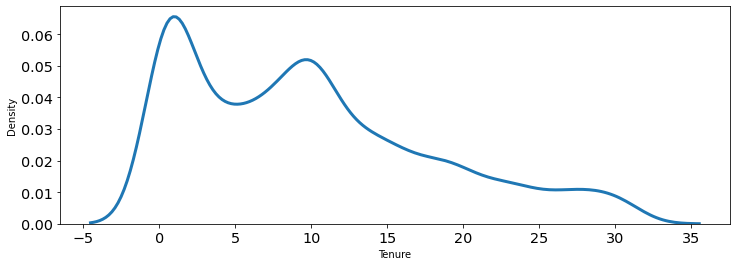

In [131]:
# distribusi tenure (nilai asli)
sns.kdeplot(df['Tenure'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='Tenure', ylabel='Density'>

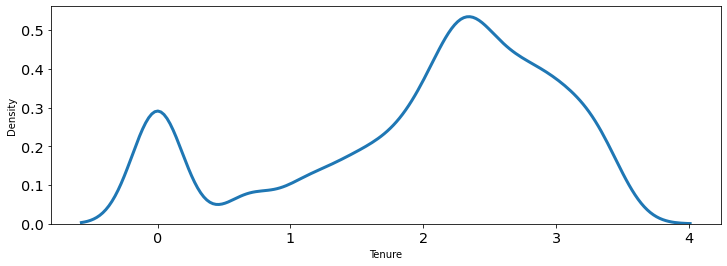

In [132]:
# distribusi tenure (setelah log transformation)
sns.kdeplot(np.log(df['Tenure']))
# lebih mendekati distribusi normal!

## Normalization/Standardization

In [133]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# tenure kita re-scale ke [0,1]
df['Tenure_norm'] = MinMaxScaler().fit_transform(df['Tenure'].values.reshape(len(df), 1))

# tenure kita standarisasi
df['Tenure_std'] = StandardScaler().fit_transform(df['Tenure'].values.reshape(len(df), 1))

In [134]:
df[['Tenure', 'Tenure_norm', 'Tenure_std']].describe()

,Tenure,Tenure_norm,Tenure_std
count,4807.000000,4807.000000,4.807000e+03
mean,9.874907,0.318545,-5.767640e-17
std,8.207313,0.264752,1.000104e+00
min,0.000000,0.000000,-1.203309e+00
25%,2.000000,0.064516,-9.595986e-01
50%,9.000000,0.290323,-1.066120e-01
75%,15.000000,0.483871,6.245194e-01
max,31.000000,1.000000,2.574203e+00


# E. Feature Encoding

In [135]:
cats = ['Churn','CityTier','PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']

for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Churn:
0    4001
1     806
Name: Churn, dtype: int64

Value count kolom CityTier:
1    3133
3    1483
2     191
Name: CityTier, dtype: int64

Value count kolom PreferredLoginDevice:
Mobile Phone    3430
Computer        1377
Name: PreferredLoginDevice, dtype: int64

Value count kolom PreferredPaymentMode:
Debit Card          1986
Credit Card         1515
E wallet             527
Cash on Delivery     432
UPI                  347
Name: PreferredPaymentMode, dtype: int64

Value count kolom Gender:
Male      2889
Female    1918
Name: Gender, dtype: int64

Value count kolom PreferedOrderCat:
Mobile Phone          1830
Laptop & Accessory    1799
Fashion                689
Grocery                295
Others                 194
Name: PreferedOrderCat, dtype: int64

Value count kolom MaritalStatus:
Married     2519
Single      1485
Divorced     803
Name: MaritalStatus, dtype: int64



Strategi encoding
* `Churn`, `CityTier`, `Gender`, & `MaritalStatus` \: label encoding
* `PreferredLoginDevice` , `PreferredPaymentMode` & `PreferedOrderCat` \: One Hot Encoding 

In [136]:
# Label encoding
mapping_Churn = {
    '0' : 0,
    '1' : 1
}

mapping_CityTier = {
    '1' : 1,
    '2' : 2,
    '3' : 3
  
}

mapping_Gender = {
    'Female' : 0,
    'Male' : 1
      
}

mapping_MaritalStatus = {
    'Single' : 0,
    'Married' : 1,
    'Divorced' : 2
  
}

df['Churn'] = df['Churn'].map(mapping_Churn)
df['CityTier'] = df['CityTier'].map(mapping_CityTier)
df['Gender'] = df['Gender'].map(mapping_Gender)
df['MaritalStatus'] = df['MaritalStatus'].map(mapping_MaritalStatus)

In [137]:
# One hot encoder
# WARNING: run code ini sekali saja
for cat in ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat']:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

## Drop kolom-kolom yang outdated

In [138]:
df = df.drop(columns=['Tenure', 'Tenure_norm', 'PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat'])

In [142]:
df.sample(5)

,Churn,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,...,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
4402,0,1,26.000000,1,3.0,4,5,1,4,0,...,0,0,1,0,0,0,0,1,0,0
1061,1,3,18.000000,1,2.0,3,1,0,4,1,...,0,0,0,0,1,0,0,1,0,0
4575,1,3,13.000000,0,3.0,6,3,1,2,0,...,0,0,0,1,0,0,0,0,1,0
284,0,1,35.000000,0,3.0,3,3,1,3,0,...,0,0,1,0,0,0,0,1,0,0
431,0,1,15.639896,1,2.0,3,2,0,3,0,...,0,0,1,0,0,0,0,1,0,0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4807 entries, 0 to 5629
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  4807 non-null   int64  
 1   CityTier                               4807 non-null   int64  
 2   WarehouseToHome                        4807 non-null   float64
 3   Gender                                 4807 non-null   int64  
 4   HourSpendOnApp                         4807 non-null   float64
 5   NumberOfDeviceRegistered               4807 non-null   int64  
 6   SatisfactionScore                      4807 non-null   int64  
 7   MaritalStatus                          4807 non-null   int64  
 8   NumberOfAddress                        4807 non-null   int64  
 9   Complain                               4807 non-null   int64  
 10  OrderAmountHikeFromlastYear            4807 non-null   float64
 11  Coup

# F. handling data imbalance
Section ini hanya **hypothetical** saja (untuk demonstrasi metode handling data imbalance)

In [144]:
# pembuatan binary label target
df['Churn_class'] = df['Churn'] > 0
df['Churn_class'].value_counts()

False    4001
True      806
Name: Churn_class, dtype: int64

In [145]:
# pemisahan features vs target
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Churn', 'Churn_class']]]
y = df['Churn_class'].values
print(X.shape)
print(y.shape)

(4807, 27)
(4807,)


In [148]:
from imblearn import under_sampling, over_sampling
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE(0.5).fit_resample(X, y)

ModuleNotFoundError: No module named 'imblearn'

In [147]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    4001
True      806
dtype: int64


UNDERSAMPLING


NameError: name 'y_under' is not defined